# House Prices - Advanced Regression Techniques
(Preços de casas - Técnicas Avançadas de Regressão)

<img src="https://storage.googleapis.com/kaggle-media/competitions/House%20Prices/kaggle_5407_media_housesbanner.png" width=800>


- Vamos utilizar o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - É um dataset de **competição**
    - Temos uma base com a **descrição de cada uma das colunas (data_description.txt)**
- **Etapas do Projeto:**
    - O projeto será realizado aplicando submissões no kaggle a medida que o tratamento dos dados forem tomando forma, isso possibilita verificar o desempenho dos modelos preditivos a modificações específicas neste tratamento.

In [172]:
# importando o pandas
import pandas as pd

In [173]:
# Importando as bases de treino e teste disponibilizadas
base_train = pd.read_csv("train.csv")
base_teste = pd.read_csv("test.csv")         

### Primeira observação
- A base possui muitas colunas e relativamento poucas linhas
- Isso deve ser considerado na escolha dos modelos
- Essa característica pode tender a Overfitting

In [174]:
# Observar shape das bases
print(base_train.shape)
print(base_teste.shape)

(1460, 81)
(1459, 80)


In [175]:
# Informações
base_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Pequena predominância de colunas categóricas até agora
- 43 colunas categóricas
- 37 colunas numéricas

In [176]:
# Contar colunas do tipo object na base de treino
train_obj = base_train.select_dtypes(include=['object'])
len(train_obj.columns)

43

## Analisar se as colunas com valores ausentes realmente representa problema na base
- Caso não seja problema da base posso tratar como uma informação
- Observar descrição da base

In [177]:
base_train[base_train.columns[base_train.isnull().sum()>0]].isnull().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

## Descartar colunas com muitos valores ausentes
- Antes de descartar preciso verificar se esses valores ausentes realmente é um problema da base ou tem um significado
- O critério aqui adotado é descartar features com mais de 20% de valores nulos
- Um baixo percentual devido a base já possuir poucas linhas

In [178]:
(base_train[base_train.columns[base_train.isnull().sum() > 0]].isnull().sum().sort_values(ascending=False)/base_train.shape[0])*100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

**A descrição informa que os valores nulos da coluna PoolQC significam que a casa não possuem piscina**
- Poderia considerar essa informação, porém, apenas um percentual insignificante dos dados possuem piscina
- Posso descartar essa coluna e outras que possuam informalção sobre piscina, no caso, a PoolArea

In [179]:
# Demonstrando que mais de 99% dos dados dessa base correspondem a 0
base_train.PoolArea.quantile(0.99)

0.0

In [180]:
# Dropar colunas PoolQC e PoolArea nas bases de treino e teste
base_train = base_train.drop(['PoolQC','PoolArea'],axis=1)
base_teste = base_teste.drop(['PoolQC','PoolArea'],axis=1)

**Devido a pequena quantidade de linhas, os dados que apresentam um valor com predominancia acima de 80% também serão descartados**
- Na coluna Fence os valores nulos significam que não possui cerca, porém, pelo critéri citado, também será descartada 

In [181]:
base_train = base_train.drop(['MiscFeature','Alley','Fence'],axis=1)
base_teste = base_teste.drop(['MiscFeature','Alley','Fence'],axis=1)

In [182]:
# Verificar colunas restantes
(base_train[base_train.columns[base_train.isnull().sum() > 0]].isnull().sum().sort_values(ascending=False)/base_train.shape[0])*100

MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

**Não há informação sobre os nulos da coluna MasVnrType**
- Porém, existe outra coluna com valores parecidos que podem ser comparados

In [183]:
# Os valores nulos em Type provavelmente significa ausencia dele quando a Area tem valor 0
base_train[['MasVnrType','MasVnrArea']].value_counts(dropna=False)

MasVnrType  MasVnrArea
NaN         0.0           859
            NaN             8
BrkFace     180.0           7
            120.0           7
            16.0            6
                         ... 
            278.0           1
            272.0           1
            263.0           1
            262.0           1
BrkCmn      41.0            1
Name: count, Length: 402, dtype: int64

In [184]:
# Substituir por -1 quando a área for 0
base_train.loc[base_train.MasVnrType.isnull() & (base_train.MasVnrArea == 0),'MasVnrType'] = '-1'

In [185]:
# Nos casos onde ambos são NaN podemos substituir o Type pela moda e a Area pela mediana
base_train[['MasVnrType','MasVnrArea']].value_counts(dropna=False)

MasVnrType  MasVnrArea
-1          0.0           859
NaN         NaN             8
BrkFace     120.0           7
            180.0           7
            16.0            6
                         ... 
            361.0           1
            57.0            1
            365.0           1
            368.0           1
BrkCmn      66.0            1
Name: count, Length: 402, dtype: int64

In [186]:
# Tratar demais valores
base_train.MasVnrArea.fillna(base_train.MasVnrArea.median(),inplace=True) 
base_train.loc[base_train.MasVnrType.isnull(),'MasVnrType'] = '-1'

In [187]:
base_train[['MasVnrType','MasVnrArea']].value_counts(dropna=False)

MasVnrType  MasVnrArea
-1          0.0           867
BrkFace     120.0           7
            180.0           7
            80.0            6
            108.0           6
                         ... 
            256.0           1
            255.0           1
            254.0           1
            250.0           1
Stone       860.0           1
Name: count, Length: 401, dtype: int64

**Repetir procedimento na base de teste**

In [188]:
base_teste[['MasVnrType','MasVnrArea']].value_counts(dropna=False)

MasVnrType  MasVnrArea
NaN         0.0           876
            NaN            15
BrkFace     176.0           8
            200.0           7
            216.0           6
                         ... 
            283.0           1
            278.0           1
            276.0           1
            275.0           1
            332.0           1
Name: count, Length: 371, dtype: int64

In [189]:
# Substituir por -1 quando a área for 0
base_teste.loc[base_teste.MasVnrType.isnull() & (base_teste.MasVnrArea == 0),'MasVnrType'] = '-1'

In [190]:
# Tratar demais valores
base_teste.MasVnrArea.fillna(base_teste.MasVnrArea.median(),inplace=True) 
base_teste.loc[base_teste.MasVnrType.isnull(),'MasVnrType'] = base_teste.MasVnrType.mode()[0]

In [191]:
# Nos casos onde ambos são NaN podemos substituir o Type pela moda e a Area pela mediana
base_teste[['MasVnrType','MasVnrArea']].value_counts(dropna=False)

MasVnrType  MasVnrArea
-1          0.0           891
BrkFace     176.0           8
            200.0           7
            144.0           6
            504.0           6
                         ... 
            359.0           1
            89.0            1
            364.0           1
            365.0           1
Stone       1224.0          1
Name: count, Length: 370, dtype: int64

In [192]:
(base_train[base_train.columns[base_train.isnull().sum() > 0]].isnull().sum().sort_values(ascending=False)/base_train.shape[0])*100

FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
Electrical       0.068493
dtype: float64

**Coluna FireplaceQu**
- A descrição dos dados aponta que significa ausencia de Fireplaces os casos onde esta nulo

In [193]:
# Podemos notar que todos os nulos aqui se referem a casas sem lareira
base_train[['FireplaceQu','Fireplaces']].value_counts(dropna=False)

FireplaceQu  Fireplaces
NaN          0             690
Gd           1             324
TA           1             259
Gd           2              54
TA           2              53
Fa           1              28
Po           1              20
Ex           1              19
             2               4
Fa           2               4
Gd           3               2
Ex           3               1
Fa           3               1
TA           3               1
Name: count, dtype: int64

In [194]:
base_train.loc[base_train.FireplaceQu.isnull(), 'FireplaceQu'] = '-1'

In [195]:
base_train[['FireplaceQu','Fireplaces']].value_counts(dropna=False)

FireplaceQu  Fireplaces
-1           0             690
Gd           1             324
TA           1             259
Gd           2              54
TA           2              53
Fa           1              28
Po           1              20
Ex           1              19
             2               4
Fa           2               4
Gd           3               2
Ex           3               1
Fa           3               1
TA           3               1
Name: count, dtype: int64

**Base de teste**

In [196]:
base_teste[['FireplaceQu','Fireplaces']].value_counts(dropna=False)

FireplaceQu  Fireplaces
NaN          0             730
Gd           1             303
TA           1             236
Gd           2              58
TA           2              39
Fa           1              35
Po           1              26
Ex           1              18
Fa           2               6
Gd           3               3
TA           3               3
Ex           2               1
TA           4               1
Name: count, dtype: int64

In [197]:
base_teste.loc[base_teste.FireplaceQu.isnull(), 'FireplaceQu'] = '-1'

In [198]:
(base_train[base_train.columns[base_train.isnull().sum() > 0]].isnull().sum().sort_values(ascending=False)/base_train.shape[0])*100

LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
Electrical       0.068493
dtype: float64

**LotFrontage**
- Não tem informações relevantes a respeito dos valores nulos nem parece fazer sentido possuir um valor 0
- Substituir pela mediana

In [199]:
base_train.LotFrontage.fillna(base_train.LotFrontage.median(),inplace=True)
base_teste.LotFrontage.fillna(base_teste.LotFrontage.median(),inplace=True)

In [200]:
(base_train[base_train.columns[base_train.isnull().sum() > 0]].isnull().sum().sort_values(ascending=False)/base_train.shape[0])*100

GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
Electrical      0.068493
dtype: float64

**Colunas que contem informação sobre garagem**

In [201]:
base_train.columns[base_train.columns.str.contains('Garage')]

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [202]:
# Podemos notar que quando GarageCars e GarageArea são 0 significa que a casa não possui garagem
# Posso atribuir -1 as colunas onde estão com valores nulos nessas linhas
base_train[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond']].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
NaN         NaN          NaN           0           0           NaN         NaN           81
Attchd      2004.0       RFn           2           420         TA          TA             5
Detchd      1940.0       Unf           1           240         TA          TA             5
Attchd      2003.0       Fin           2           420         TA          TA             5
Detchd      1948.0       Unf           1           240         TA          TA             4
                                                                                         ..
Attchd      1992.0       Unf           2           564         TA          TA             1
                         RFn           2           590         TA          TA             1
                                                   564         TA          TA             1
                                                   546         TA          TA         

In [203]:
base_train.loc[(base_train.GarageCars == 0)&(base_train.GarageArea ==0),['GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond']] = -1

In [204]:
# Verificando o que restou
base_train[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond']].isnull().sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
dtype: int64

**Repetir procedimento para base de teste**

In [205]:
base_teste.loc[(base_teste.GarageCars == 0)&(base_teste.GarageArea ==0),['GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond']] = -1

In [206]:
base_teste[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond']].isnull().sum()

GarageType      0
GarageYrBlt     2
GarageFinish    2
GarageCars      1
GarageArea      1
GarageQual      2
GarageCond      2
dtype: int64

In [207]:
# Ainda sobraram linhas com valores ausentes
# Observando quando GarageYrBlt por exemplo
base_teste[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond']].loc[base_teste.GarageYrBlt.isnull()].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
Detchd      NaN          NaN           1.0         360.0       NaN         NaN           1
                                       NaN         NaN         NaN         NaN           1
Name: count, dtype: int64

In [208]:
# Caso onde GarageCars =1 e GarageArea = 360
# provavel que GarageQual e GarageCond sejam TA, GarageFinish seja Unf e o ano entre 1934 e 1974
base_teste[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond']].loc[(base_teste.GarageCars == 1)&(base_teste.GarageArea == 360)]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
754,Detchd,1934.0,RFn,1.0,360.0,TA,TA
825,Detchd,1974.0,Unf,1.0,360.0,TA,TA
1127,Attchd,1975.0,Unf,1.0,360.0,TA,TA
1400,Attchd,1969.0,Unf,1.0,360.0,TA,TA


In [209]:
base_teste.loc[(base_teste.GarageCars == 1)&(base_teste.GarageArea == 360),['GarageYrBlt']] = 1950
base_teste.loc[(base_teste.GarageCars == 1)&(base_teste.GarageArea == 360),['GarageQual','GarageCond']] = "TA"
base_teste.loc[(base_teste.GarageCars == 1)&(base_teste.GarageArea == 360),['GarageFinish']] = "Unf"

In [210]:
# Para a linha onde quase todas são nulas posso substituir pela mediana os valores numericos e pela moda os textos
base_teste.GarageYrBlt = base_teste.GarageYrBlt.fillna(base_teste.GarageYrBlt.median())
base_teste.GarageFinish = base_teste.GarageFinish.fillna(base_teste.GarageFinish.mode()[0])
base_teste.GarageCars = base_teste.GarageCars.fillna(base_teste.GarageCars.median())
base_teste.GarageArea = base_teste.GarageArea.fillna(base_teste.GarageArea.median())
base_teste.GarageQual = base_teste.GarageQual.fillna(base_teste.GarageQual.mode()[0])
base_teste.GarageCond = base_teste.GarageCond.fillna(base_teste.GarageCond.mode()[0])

In [211]:
# Observar se restaram valores nulos
base_teste[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond']].isnull().sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
dtype: int64

**Podemos notar que as colunas GarageQual e GarageCond parecem ter sempre os mesmos valores**

In [212]:
# Existe uma grande correlação entre elas
base_train[['GarageQual','GarageCond']].value_counts()

GarageQual  GarageCond
TA          TA            1291
-1          -1              81
Fa          TA              24
            Fa              20
TA          Fa              15
Gd          TA              10
TA          Gd               5
Fa          Po               4
Gd          Gd               4
Po          Po               3
Ex          Ex               2
            TA               1
Name: count, dtype: int64

In [213]:
# Verificar porcentage d valores iguais entre essas colunas
# Praticamente 96% das linhas dessas duas colunas são iguais
((base_train.loc[(base_train.GarageQual == base_train.GarageCond)].shape[0])/base_train.shape[0])*100

95.95890410958904

In [214]:
# Qual das duas 'dropar'? Como o percentual é muito elevado não vaiu fazer muita diferença, dispença análise
base_train.drop('GarageCond',axis=1,inplace=True)
base_teste.drop('GarageCond',axis=1,inplace=True)

In [215]:
# Atualizar col_null
col_null = base_train.columns[base_train.isnull().sum() != 0]
((base_train[col_null].isnull().sum().sort_values(ascending=False))/base_train.shape[0])*100

BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
Electrical      0.068493
dtype: float64

**Colunas que contém Bsmt(porão)**

In [216]:
base_train.columns[base_train.columns.str.contains("Bsmt")]

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')

In [217]:
# Aqui também pode ser considerado que as colunas que apresentam valores nulos quando as demais são 0
base_train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath']].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
NaN       NaN       NaN           NaN           0           NaN           0           0          0            0             0               37
Gd        TA        No            Unf           0           Unf           0           728        728          0             0                5
                                                                                      384        384          0             0                5
                                                                                      600        600          0             0                4
TA        TA        No            Unf           0           Unf           0           672        672          0             0                4
                                                                                                                                            ..
Gd   

In [218]:
base_train.loc[(base_train.BsmtFinSF1 == 0)&(base_train.BsmtFinSF2 == 0)&(base_train.BsmtUnfSF == 0),['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = -1

In [219]:
# Ainda restam valores nulos
base_train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath']].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    1
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    1
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [220]:
# Substituir os valores nulos pela moda
base_train.BsmtExposure = base_train.BsmtExposure.fillna(base_train.BsmtExposure.mode()[0])
base_train.BsmtFinType2 = base_train.BsmtFinType2.fillna(base_train.BsmtFinType2.mode()[0])

**Repetir procedimento para base de teste**

In [221]:
base_teste[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath']].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
NaN       NaN       NaN           NaN           0.0         NaN           0.0         0.0        0.0          0.0           0.0             40
Gd        TA        No            Unf           0.0         Unf           0.0         738.0      738.0        0.0           0.0              5
TA        TA        No            Unf           0.0         Unf           0.0         816.0      816.0        0.0           0.0              5
                                                                                      546.0      546.0        0.0           0.0              4
                                                                                      672.0      672.0        0.0           0.0              4
                                                                                                                                            ..
Gd   

In [222]:
base_teste.loc[(base_teste.BsmtFinSF1 == 0)&(base_teste.BsmtFinSF2 == 0)&(base_teste.BsmtUnfSF == 0),['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = -1

In [223]:
base_teste[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath']].isnull().sum()

BsmtQual        3
BsmtCond        4
BsmtExposure    3
BsmtFinType1    1
BsmtFinSF1      1
BsmtFinType2    1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
dtype: int64

In [224]:
# Para a linha onde quase todas são nulas posso substituir pela mediana os valores numericos e pela moda os textos
base_teste.BsmtQual = base_teste.BsmtQual.fillna(base_teste.BsmtQual.mode()[0])
base_teste.BsmtCond = base_teste.BsmtCond.fillna(base_teste.BsmtCond.mode()[0])
base_teste.BsmtExposure = base_teste.BsmtExposure.fillna(base_teste.BsmtExposure.mode()[0])
base_teste.BsmtFinType1 = base_teste.BsmtFinType1.fillna(base_teste.BsmtFinType1.mode()[0])
base_teste.BsmtFinType2 = base_teste.BsmtFinType2.fillna(base_teste.BsmtFinType2.mode()[0])
base_teste.TotalBsmtSF = base_teste.TotalBsmtSF.fillna(base_teste.TotalBsmtSF.median())
base_teste.BsmtUnfSF = base_teste.BsmtUnfSF.fillna(base_teste.BsmtUnfSF.median())
base_teste.BsmtFinSF2 = base_teste.BsmtFinSF2.fillna(base_teste.BsmtFinSF2.median())
base_teste.BsmtFinSF1 = base_teste.BsmtFinSF1.fillna(base_teste.BsmtFinSF1.median())
base_teste.BsmtFullBath = base_teste.BsmtFullBath.fillna(base_teste.BsmtFullBath.median())
base_teste.BsmtHalfBath = base_teste.BsmtHalfBath.fillna(base_teste.BsmtHalfBath.median())

In [225]:
# Atualizar col_null
col_null = base_train.columns[base_train.isnull().sum() != 0]
((base_train[col_null].isnull().sum().sort_values(ascending=False))/base_train.shape[0])*100

Electrical    0.068493
dtype: float64

In [226]:
# A coluna Electrical será preenchida pela moda
base_train.Electrical = base_train.Electrical.fillna(base_train.Electrical.mode()[0])
base_teste.Electrical = base_teste.Electrical.fillna(base_teste.Electrical.mode()[0])

In [227]:
# Atualizar col_null
col_null = base_train.columns[base_train.isnull().sum() != 0]
((base_train[col_null].isnull().sum().sort_values(ascending=False))/base_train.shape[0])*100

Series([], dtype: float64)

In [228]:
# Atualizar col_null
col_null = base_teste.columns[base_teste.isnull().sum() != 0]
((base_teste[col_null].isnull().sum().sort_values(ascending=False))/base_teste.shape[0])*100

MSZoning       0.27416
Utilities      0.13708
Functional     0.13708
Exterior1st    0.06854
Exterior2nd    0.06854
KitchenQual    0.06854
SaleType       0.06854
dtype: float64

In [229]:
# tratar demais colunas
base_teste.MSZoning = base_teste.MSZoning.fillna(base_teste.MSZoning.mode()[0])
base_teste.Utilities= base_teste.Utilities.fillna(base_teste.Utilities.mode()[0])
base_teste.Functional = base_teste.Functional.fillna(base_teste.Functional.mode()[0])
base_teste.Exterior1st = base_teste.Exterior1st.fillna(base_teste.Exterior1st.mode()[0])
base_teste.Exterior2nd = base_teste.Exterior2nd.fillna(base_teste.Exterior2nd.mode()[0])
base_teste.KitchenQual = base_teste.KitchenQual.fillna(base_teste.KitchenQual.mode()[0])
base_teste.SaleType= base_teste.SaleType.fillna(base_teste.SaleType.mode()[0])

In [230]:
base_teste.isnull().sum().sum()

0

In [231]:
base_train.isnull().sum().sum()

0

In [232]:
base_teste.columns[base_teste.isnull().sum()>0]

Index([], dtype='object')

# Continuar análise da base

### Observar possibilidade de agregar colunas

In [233]:
base_train.select_dtypes(exclude=object).columns[base_train.select_dtypes(exclude=object).columns.str.contains('Garage')]

Index(['GarageYrBlt', 'GarageCars', 'GarageArea'], dtype='object')

In [234]:
# Multiplicar carros na garagem com Area da garagem
# Multiplicação para nao ter problema com divisao por 0
base_train['GarageArea/Car'] =  base_train.GarageArea*base_train.GarageCars 
base_teste['GarageArea/Car'] =  base_teste.GarageArea*base_teste.GarageCars 
base_train.drop(['GarageCars','GarageArea'],axis=1,inplace=True)
base_teste.drop(['GarageCars','GarageArea'],axis=1,inplace=True)

In [235]:
base_train.select_dtypes(exclude=object).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice', 'GarageArea/Car'],
      dtype='object')

In [236]:
# TotalBsmtSF e 1stFlrSF colunas indicam a área do porão e a área do primeiro andar
# AreaTotal
base_train['AreaTotalBsmt'] = base_train.TotalBsmtSF + base_train['1stFlrSF']
base_teste['AreaTotalBsmt'] = base_teste.TotalBsmtSF + base_teste['1stFlrSF']
base_train.drop(['TotalBsmtSF','1stFlrSF'],axis=1,inplace=True)
base_teste.drop(['TotalBsmtSF','1stFlrSF'],axis=1,inplace=True)

## Observar distribuição da variável target

In [237]:
base_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

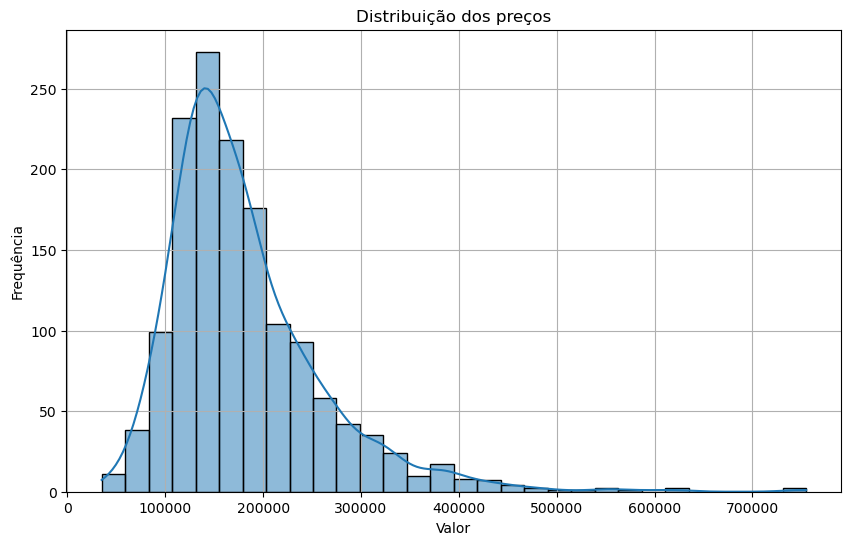

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(base_train['SalePrice'], bins=30, kde=True)  # kde=True adiciona a curva de densidade
plt.title('Distribuição dos preços')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [239]:
base_train.columns[base_train.isnull().sum()>0]

Index([], dtype='object')

### Distribuição das features numéricas

In [240]:
base_num = base_train.select_dtypes(exclude=object)

In [241]:
# Existem colunas com uma predominância muito elevada de valores 0
base_num.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,GarageArea/Car,AreaTotalBsmt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,46.660274,21.954110,3.409589,15.060959,43.489041,6.321918,2007.815753,180921.195890,976.719178,2220.056164
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,66.256028,61.119149,29.317331,55.757415,496.123024,2.703626,1.328095,79442.502883,709.723243,787.333406
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,334.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,336.000000,1696.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,948.000000,2064.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1152.000000,2661.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,547.000000,552.000000,508.000000,480.000000,15500.000000,12.000000,2010.000000,755000.000000,5424.000000,10802.000000


## Checkpoint 1
- Primeira base para observar o desempenho nos modelos que forem escolhidos

In [242]:
# Exportando a base de treino e teste
base_train.to_csv('train_1.csv',index=False)
base_teste.to_csv('test_1.csv',index=False)

### Análise de correlação com a variável target
- Filtrar colunas pouco correlatas

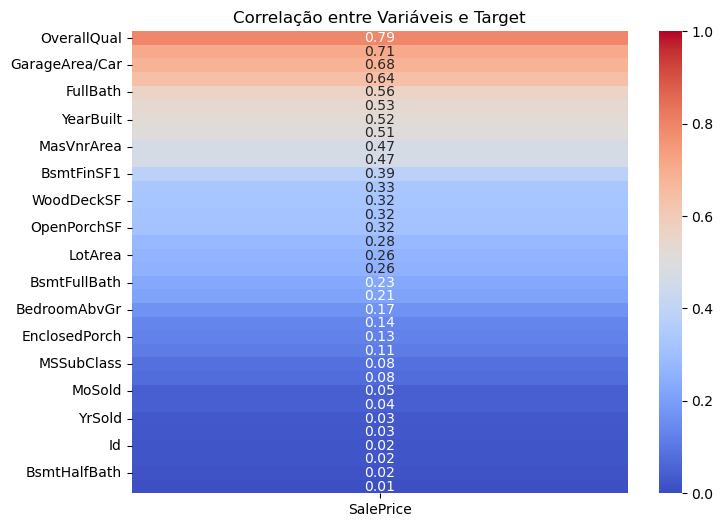

In [243]:
corr_matrix = base_train.corr(numeric_only=True)

# Cria um DataFrame apenas com as correlações com a variável target
target_corr = abs(corr_matrix[['SalePrice']].drop('SalePrice')).sort_values(by='SalePrice',ascending=False)

# Plota o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=0, vmax=1)
plt.title('Correlação entre Variáveis e Target')
plt.show()

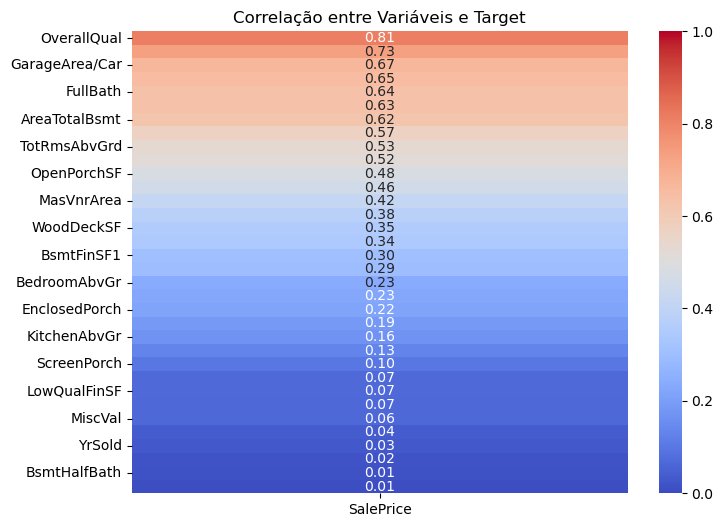

In [244]:
corr_matrix2 = base_train.corr(numeric_only=True,method='spearman')

# Cria um DataFrame apenas com as correlações com a variável target
target_corr2 = abs(corr_matrix2[['SalePrice']].drop('SalePrice')).sort_values(by='SalePrice',ascending=False)

# Plota o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr2, annot=True, cmap='coolwarm', fmt='.2f', vmin=0, vmax=1)
plt.title('Correlação entre Variáveis e Target')
plt.show()

In [245]:
# Renomear coluna da correlação de Pearson
target_corr.columns = ['SalePrice2']

In [246]:
# Juntar as duas bases de correlação
target_corr['Nome'] = target_corr2.index
target_corr['SalePrice'] = target_corr2.values

In [247]:
# As correlações das features de Spearman são maiores comparadas a correlação de Pearson
target_corr

,SalePrice2,Nome,SalePrice
OverallQual,0.790982,OverallQual,0.809829
GrLivArea,0.708624,GrLivArea,0.731310
GarageArea/Car,0.680058,GarageArea/Car,0.668591
AreaTotalBsmt,0.639368,YearBuilt,0.652682
FullBath,0.560664,FullBath,0.635957
TotRmsAbvGrd,0.533723,GarageYrBlt,0.634095
YearBuilt,0.522897,AreaTotalBsmt,0.623865
YearRemodAdd,0.507101,YearRemodAdd,0.571159
MasVnrArea,0.472614,TotRmsAbvGrd,0.532586
Fireplaces,0.466929,Fireplaces,0.519247


In [248]:
# Considerar correlação de spearman
# Filtrar correlações maiores de 0.3
target_corr2.index[target_corr2.SalePrice > 0.3]

Index(['OverallQual', 'GrLivArea', 'GarageArea/Car', 'YearBuilt', 'FullBath',
       'GarageYrBlt', 'AreaTotalBsmt', 'YearRemodAdd', 'TotRmsAbvGrd',
       'Fireplaces', 'OpenPorchSF', 'LotArea', 'MasVnrArea', 'LotFrontage',
       'WoodDeckSF', 'HalfBath', 'BsmtFinSF1'],
      dtype='object')

In [249]:
# Filtrar essas colunas em treino e teste
base_train = base_train[target_corr2.index[target_corr2.SalePrice > 0.3]]
base_teste = base_teste[target_corr2.index[target_corr2.SalePrice > 0.3]]

In [250]:
# Observar estatísticas
# Podemos perceber que algumas colunas com muita predominância de zeros ainda foram mantidas por apresentar correlação maior que 0.3
base_num = base_train.select_dtypes(exclude=object)
base_num.describe()

,OverallQual,GrLivArea,GarageArea/Car,YearBuilt,FullBath,GarageYrBlt,AreaTotalBsmt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,OpenPorchSF,LotArea,MasVnrArea,LotFrontage,WoodDeckSF,HalfBath,BsmtFinSF1
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,976.719178,1971.267808,1.565068,1868.684247,2220.056164,1984.865753,6.517808,0.613014,46.660274,10516.828082,103.117123,69.863699,94.244521,0.382877,443.639726
std,1.382997,525.480383,709.723243,30.202904,0.550916,453.925967,787.333406,20.645407,1.625393,0.644666,66.256028,9981.264932,180.731373,22.027677,125.338794,0.502885,456.098091
min,1.000000,334.000000,0.000000,1872.000000,0.000000,-1.000000,334.000000,1950.000000,2.000000,0.000000,0.000000,1300.000000,0.000000,21.000000,0.000000,0.000000,0.000000
25%,5.000000,1129.500000,336.000000,1954.000000,1.000000,1958.000000,1696.000000,1967.000000,5.000000,0.000000,0.000000,7553.500000,0.000000,60.000000,0.000000,0.000000,0.000000
50%,6.000000,1464.000000,948.000000,1973.000000,2.000000,1977.000000,2064.000000,1994.000000,6.000000,1.000000,25.000000,9478.500000,0.000000,69.000000,0.000000,0.000000,383.500000
75%,7.000000,1776.750000,1152.000000,2000.000000,2.000000,2001.000000,2661.000000,2004.000000,7.000000,1.000000,68.000000,11601.500000,164.250000,79.000000,168.000000,1.000000,712.250000
max,10.000000,5642.000000,5424.000000,2010.000000,3.000000,2010.000000,10802.000000,2010.000000,14.000000,3.000000,547.000000,215245.000000,1600.000000,313.000000,857.000000,2.000000,5644.000000


In [251]:
# Adicionar coluna target
base_train_targ = pd.read_csv("train_1.csv")    

In [252]:
base_train['SalePrice'] = base_train_targ['SalePrice']

## Checkpoint 2
- Segunda base para observar o desempenho nos modelos que forem escolhidos

In [253]:
# Exportando a base de treino e teste
base_train.to_csv('train_2.csv',index=False)
base_teste.to_csv('test_2.csv',index=False)